# Visualizing some of the insights

In [13]:
import duckdb

con = duckdb.connect('../data/sakila.duckdb')
con.sql("SET search_path='staging';")

### Top 5 costumers

In [31]:
top_five = con.sql("""--sql
    SELECT
    cu.first_name || ' ' || cu.last_name AS customer,
    SUM(p.amount) AS total_amount
    FROM
    customer cu
    JOIN payment p ON p.customer_id = cu.customer_id
    GROUP BY customer
    LIMIT 15;
    """).df()

<Axes: xlabel='customer'>

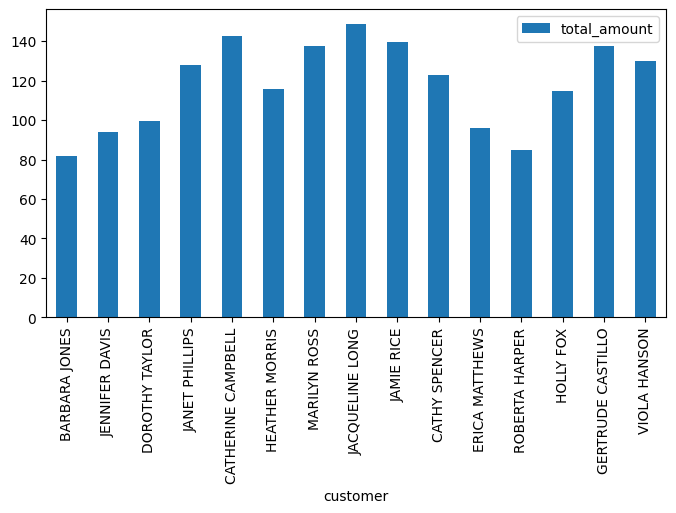

In [32]:
top_five.plot(kind='bar', x='customer', y='total_amount', figsize=(8,4))

### Top providing category

In [25]:
top_categories = con.sql("""--sql
    SELECT
    c.name AS category,
    SUM(p.amount) AS total_revenue
    FROM
    category c
    JOIN film_category fc ON fc.category_id = c.category_id
    JOIN film f ON fc.film_id = f.film_id
    JOIN inventory i ON f.film_id = i.film_id
    JOIN rental r ON i.inventory_id = r.inventory_id
    JOIN payment p ON r.rental_id = p.rental_id
    GROUP BY category;
        """).df()

<Axes: xlabel='category'>

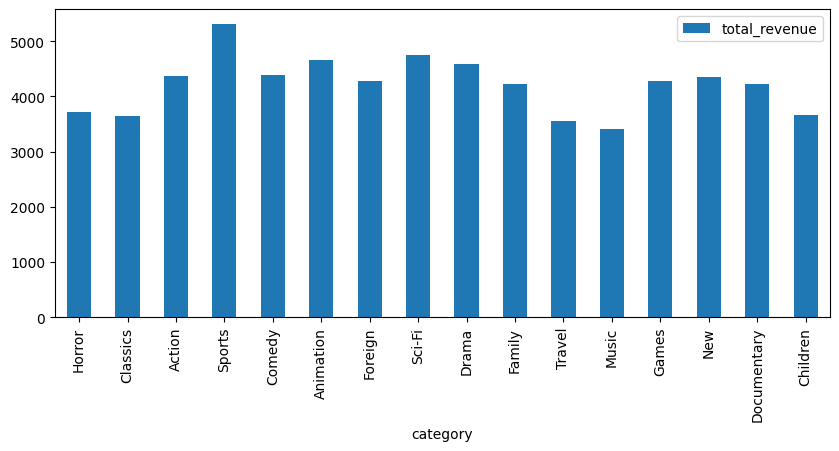

In [26]:
top_categories.plot(kind='bar', x='category', y='total_revenue', figsize=(10,4))